In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df= pd.read_csv('dataSet/kc_house_data.csv')

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [56]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

In [57]:
len(df.columns)

19

In [58]:
# Display the number of null data observations
df.isnull().values.sum()

2

In [59]:
# Specify features and target
X = df.iloc[:, 1:].columns.tolist()
y = df.iloc[:, 0].name

In [60]:
corr=df.corr()
corr['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [61]:
# Correlations with target variable
cor_target = abs(corr['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [62]:
# Remove features with correlation < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

<AxesSubplot:>

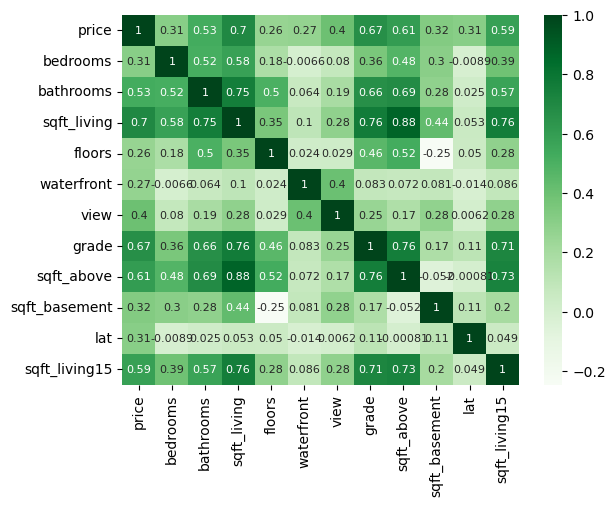

In [63]:
sns.heatmap(df.corr(), annot=True, cmap='Greens', annot_kws={'size': 8})

In [64]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [65]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168


In [66]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

In [67]:
# Create X, y and theta
X = df.iloc[:, 1:]
# Création de la matrice X, inclut le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(21613, 10)
[[-0.86669728 -0.39872792 -1.44743008 -0.97981235 -0.91540583 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1.        ]
 [-0.00568779 -0.39872792  0.17560263  0.53362199  0.93648411 -0.08717061
  -0.30575239 -0.55882282  0.24513573  1.        ]
 [-0.98082666 -1.47392526 -1.44743008 -1.42622105 -0.91540583 -0.08717061
  -0.30575239 -1.4095545  -0.6586658   1.        ]
 [ 0.17408642  0.67646941  1.14942226 -0.13054704 -0.91540583 -0.08717061
  -0.30575239 -0.55882282  1.39748267  1.        ]
 [-0.08195563 -0.39872792 -0.14900391 -0.43541151 -0.91540583 -0.08717061
  -0.30575239  0.29190886 -0.6586658   1.        ]
 [ 1.86559826  0.67646941  3.09706152  3.63670681 -0.91540583 -0.08717061
  -0.30575239  2.84410389  2.79837504  1.        ]
 [-0.76972816 -0.39872792  0.17560263 -0.39730345  0.93648411 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1.        ]
 [-0.67616386 -0.39872792 -0.798217   -1.11046856 -0.91540583 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   

In [68]:
y = df.iloc[:, 0:1].values #Price
# Initialisation du vecteur theta aléatoire, avec 10 éléments (car X a 10 colonnes)
np.random.seed(0)
theta = np.random.randn(10, 1)
theta

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885],
       [ 0.4105985 ]])

In [78]:
print(X.shape)
print(y.shape)
print(theta.shape)

(21613, 10)
(21613, 1)
(10, 1)


In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=True)

In [85]:
poly_features = polynomial_converter.fit_transform(X)

In [86]:
poly_features.shape

(21613, 66)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [96]:
print(X_train.shape,X_test.shape)

(15129, 66) (6484, 66)


In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
model = LinearRegression(fit_intercept=True)

In [99]:
model.fit(X_train,y_train)

LinearRegression()

In [114]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
predictions=model.predict(poly_features)

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [105]:
MAE

5.160408975863295e-10

In [107]:
MSE

9.377746829041417e-19

In [109]:
RMSE

9.683876718051204e-10

In [115]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [1]:
coef_determination(y, predictions)  #Presque la même que la regression from scratch (0.99)

NameError: name 'coef_determination' is not defined

In [3]:
#

In [ ]:
from sklearn import linear_model

